In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.cm.tab10
import seaborn as snb

### Hypter Parameters

In [21]:
num_impute = "mean" # One of ["mean", "zero", "infinity"]
cat_impute = "none" # One of ["mode", "none"]

# Reading the dataset

In [47]:
data = pd.read_csv("../dataset/german_credit_data_withrisk.csv", index_col=0)

In [48]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Intial Data Analysis

## Preprocessing

## Replace categorical Integer values with words

In [49]:
job_index2word = {
    0: "unskilled and non-resident", 
    1: "unskilled and resident", 
    2: "skilled", 
    3: "highly skilled"
}
def assign_job_type(col):
    return job_index2word[col]

In [50]:
data.Job = data.Job.apply(assign_job_type)

In [51]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [52]:
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
num_cols = ['Age', 'Credit amount', 'Duration']

## Impute missing values

In [53]:
def impute_with_mean(df):
    out = pd.DataFrame(df)
    for col in df.columns:
        if col in num_cols:
            out.loc[out[col].isna(), col] = df[col].mean()
    return out
def impute_with_zero(df):
    out = pd.DataFrame(df)
    for col in df.columns:
        if col in num_cols:
            out.loc[out[col].isna(), col] = 0.0
    return out


def impute_with_infinity(df):
    out = pd.DataFrame(df)
    for col in df.columns:
        if col in num_cols:
            out.loc[out[col].isna(), col] = float("inf")
    return out
def impute_with_mode(df):
    out = pd.DataFrame(df)
    for col in df.columns:
        if col in cat_cols:
            out.loc[out[col].isna(), col] = df[col].mode().iat[0]
    return out
def impute_with_none(df):
    out = pd.DataFrame(df)
    for col in df.columns:
        if col in cat_cols:
            out.loc[out[col].isna(), col] = "None"
    return out

In [54]:
def get_impute_function(name):
    assert name in ["mean", "zero", "infinity", "mode", "none"]
    if name == "mean":
        return impute_with_mean
    elif name == "zero":
        return impute_with_zero
    elif name == "infinity":
        return impute_with_infinity
    elif name == "mode":
        return impute_with_mode
    else:
        return impute_with_none

In [55]:
def impute_missing_values(df, num_impute, cat_impute):
    num_impute_function = get_impute_function(num_impute)
    cat_impute_function = get_impute_function(cat_impute)
    new_df = num_impute_function(df)
    new_df = cat_impute_function(df)
    return new_df

In [56]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [57]:
data = impute_missing_values(data, num_impute, cat_impute)

In [58]:
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

## Data Quality Analysis

### Descriptive Analysis

In [59]:
data.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [60]:
data.median()

Age                33.0
Credit amount    2319.5
Duration           18.0
dtype: float64

In [61]:
data.mode(0)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,27.0,male,skilled,own,little,None,1258.0,24.0,car,good
1,NaN,NaN,NaN,NaN,NaN,NaN,1262.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1275.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1393.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1478.0,NaN,NaN,NaN


## Frequency Counts

In [62]:
for col in cat_cols:
    print("===========================")
    print(col, ":")
    print(data[col].value_counts())
    print("++++++++++++++++++++++++++++")

Sex :
male      690
female    310
Name: Sex, dtype: int64
++++++++++++++++++++++++++++
Job :
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: Job, dtype: int64
++++++++++++++++++++++++++++
Housing :
own     713
rent    179
free    108
Name: Housing, dtype: int64
++++++++++++++++++++++++++++
Saving accounts :
little        603
None          183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
++++++++++++++++++++++++++++
Checking account :
None        394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
++++++++++++++++++++++++++++
Purpose :
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64
++++++++++++++++++++++++++++


## Univariate Analysis

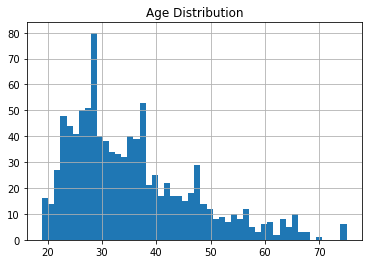

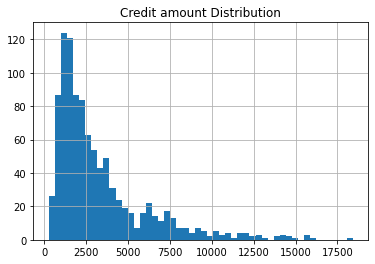

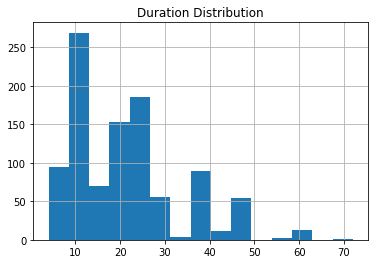

In [63]:
for col in num_cols:
    fig = plt.figure()
    plt.title("{} Distribution".format(col))
    bins = 50
    if col == "Duration":
        bins = 15
    data[col].hist(bins=bins)

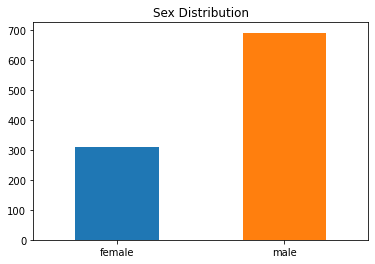

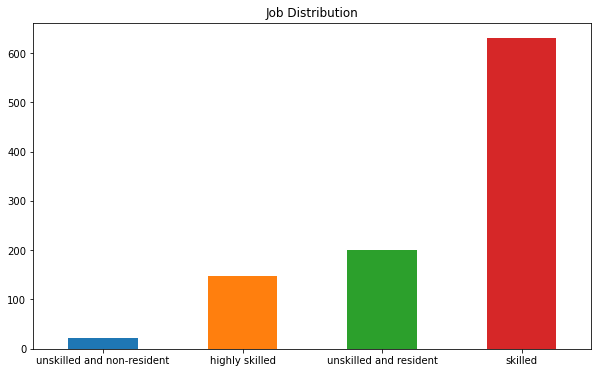

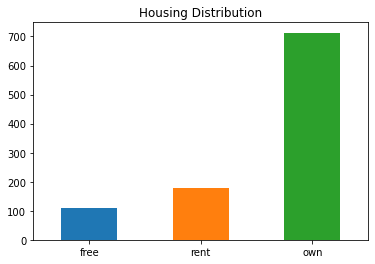

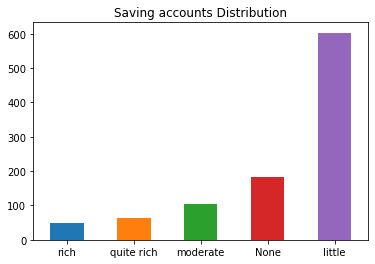

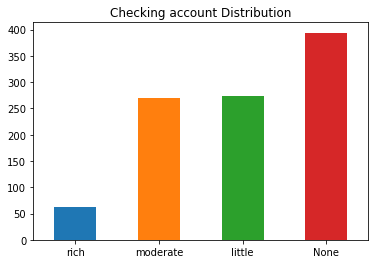

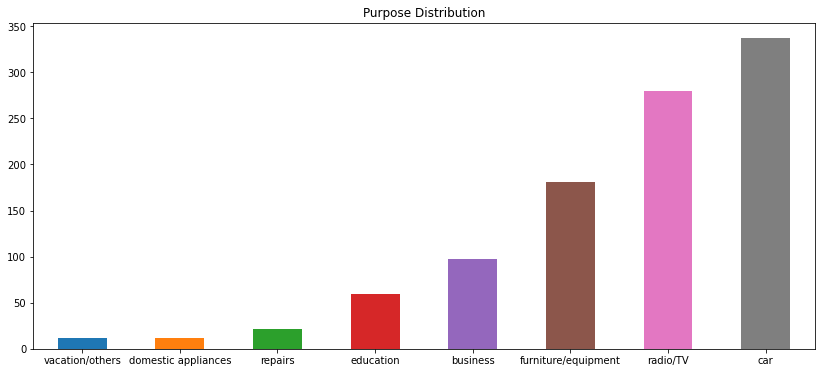

In [64]:
for col in cat_cols:
    if col == "Purpose":
        fig = plt.figure(figsize=(14, 6))
    elif col == "Job":
        fig = plt.figure(figsize=(10, 6))
    else:
        fig = plt.figure()
    plt.title("{} Distribution".format(col))
    value_counts = data[col].value_counts().sort_values()
    value_counts.plot.bar(rot=0, color = cmap(np.arange(len(value_counts))))

## Sex vs Cat features

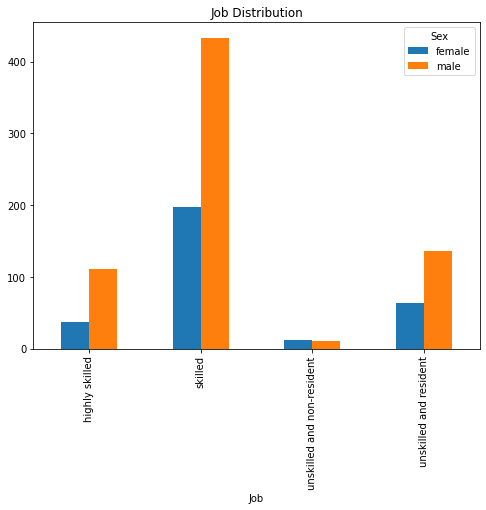

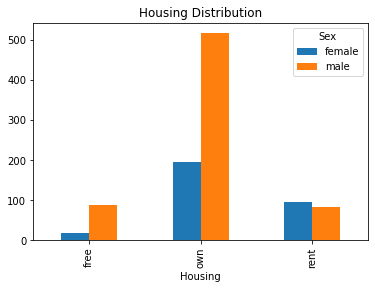

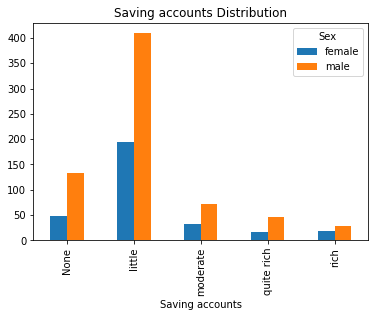

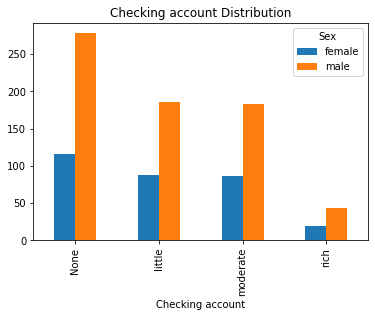

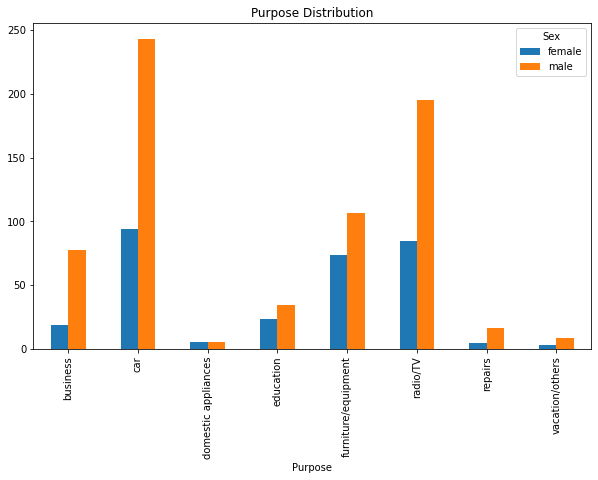

In [65]:
for col in cat_cols:
#     if col == "Sex":
#         continue
#     if col == "Purpose":
#         fig = plt.figure(figsize=(18, 6))
#     elif col == "Job":
#         fig = plt.figure(figsize=(15, 6))
#     else:
#         fig = plt.figure()
    
    value_counts = data[col].value_counts().sort_values()
#     value_counts.plot.bar(rot=0, color = cmap(np.arange(len(value_counts))))
    if col != "Sex":
        if col == "Purpose":
            fig_size = (10, 6)
        elif col == "Job":
            fig_size = (8, 6)
        else:
            fig_size = None
        data.groupby([col])["Sex"].value_counts().unstack().plot.bar(figsize=fig_size)
        plt.title("{} Distribution".format(col))
    plt.show()


## Bivariate Analysis

In [66]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


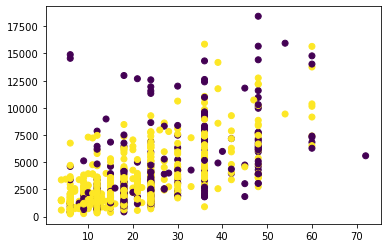

In [67]:
plt.scatter(data.Duration, data["Credit amount"], c = (data.Risk=="good").astype(np.uint8))

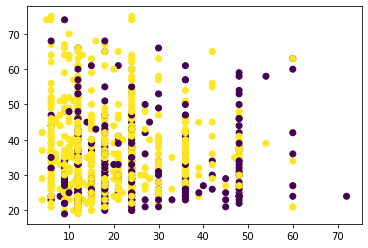

In [68]:
plt.scatter(data.Duration, data.Age, c = (data.Risk=="good").astype(np.uint8))

In [69]:
def cat2onehot(df):
    output = df.copy()
    for col in cat_cols:
        dummies = pd.get_dummies(df[col], drop_first=True)
        output = pd.concat([dummies, output], axis=1)
        output.drop(col, axis=1, inplace=True)
    return output

In [ ]:
# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

In [70]:
data = cat2onehot(data)

In [71]:
data.head()

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,little,moderate,rich,...,own,rent,skilled,unskilled and non-resident,unskilled and resident,male,Age,Credit amount,Duration,Risk
0,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,67.0,1169.0,6.0,good
1,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,22.0,5951.0,48.0,bad
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,49.0,2096.0,12.0,good
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,45.0,7882.0,42.0,good
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,53.0,4870.0,24.0,bad


In [72]:
# data.Risk = (data.Risk == "good").astype(np.float32)

In [86]:
data.head()

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,little,moderate,rich,...,own,rent,skilled,unskilled and non-resident,unskilled and resident,male,Age,Credit amount,Duration,Risk
0,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,2.765073,-0.744759,-1.235859,good
1,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,-1.190808,0.949342,2.247070,bad
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1.182721,-0.416354,-0.738298,good
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0.831087,1.633430,1.749509,good
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1.534354,0.566380,0.256825,bad


In [87]:
def normalize_numerical(df):
    output = df.copy()
    norm_params = {}
    for col in num_cols:
        mean = df[col].mean()
        std = df[col].std()
        
        output[col] = (df[col] - mean)/std
        norm_params[col] = {"mean":mean, "std":std}
    return output, norm_params

In [88]:
data, norm_params = normalize_numerical(data)

In [89]:
data.head()

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,little,moderate,rich,...,own,rent,skilled,unskilled and non-resident,unskilled and resident,male,Age,Credit amount,Duration,Risk
0,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,2.765073,-0.744759,-1.235859,good
1,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,-1.190808,0.949342,2.247070,bad
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1.182721,-0.416354,-0.738298,good
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0.831087,1.633430,1.749509,good
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1.534354,0.566380,0.256825,bad


In [90]:
norm_params

{'Age': {'mean': 4.9737991503207014e-17, 'std': 0.9999999999999999},
 'Credit amount': {'mean': 7.37188088351104e-17, 'std': 1.0},
 'Duration': {'mean': 1.5631940186722203e-16, 'std': 1.0}}

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [92]:
model = LogisticRegression()

In [93]:
X = data[data.columns[:-1]].values
y = data.Risk.values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [95]:
model.fit(X_train, y_train)

LogisticRegression()

In [96]:
pred = model.predict(X_test)

In [97]:
(pred == y_test).mean()

0.755

In [99]:
df = pd.DataFrame(dict(pred=pred, actual = y_test))

In [100]:
df.head()

,pred,actual
0,good,good
1,good,bad
2,good,bad
3,good,bad
4,good,bad


In [102]:
(pred == y_test).sum()

151

In [103]:
(pred != y_test).sum()

49

In [104]:
(pred == y_test).mean()

0.755

In [112]:
train_pred = model.predict(X_train)

In [113]:
(train_pred == y_train).mean()

0.7575

(800,)